Degree 1:
Custom Model MSE = 818398373.4234
Sklearn Model MSE = 818398373.4234
--------------------------------------------------
Degree 2:
Custom Model MSE = 143553900.3797
Sklearn Model MSE = 143553900.3797
--------------------------------------------------
Degree 3:
Custom Model MSE = 1627265.1069
Sklearn Model MSE = 1627265.1069
--------------------------------------------------
Degree 4:
Custom Model MSE = 1626600.7214
Sklearn Model MSE = 1626600.7214
--------------------------------------------------
Degree 5:
Custom Model MSE = 1625733.1261
Sklearn Model MSE = 1625733.1261
--------------------------------------------------


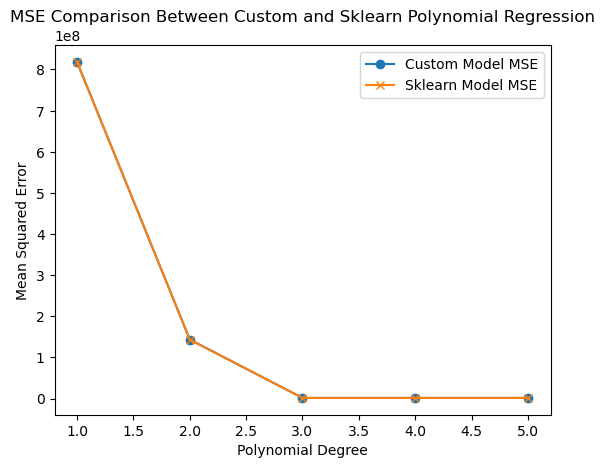

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('employee_salary_dataset.csv')  

X = data.iloc[:, 0].values.reshape(-1, 1)  
y = data.iloc[:, 1].values  

degrees = [1, 2, 3, 4, 5]

def custom_pl_regressor(X, y, degree):

    X_poly = np.ones((X.shape[0], degree + 1))
    for i in range(1, degree + 1):
        X_poly[:, i] = X[:, 0] ** i

    theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

    y_pred = X_poly.dot(theta)

    return y_pred

custom_mse_values = []
sklearn_mse_values = []

for degree in degrees:

    y_pred_custom = custom_pl_regressor(X, y, degree)
    custom_mse = mean_squared_error(y, y_pred_custom)
    custom_mse_values.append(custom_mse)

    model_sklearn = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model_sklearn.fit(X, y)

    y_pred_sklearn = model_sklearn.predict(X)
    sklearn_mse = mean_squared_error(y, y_pred_sklearn)
    sklearn_mse_values.append(sklearn_mse)

    print(f"Degree {degree}:")
    print(f"Custom Model MSE = {custom_mse:.4f}")
    print(f"Sklearn Model MSE = {sklearn_mse:.4f}")
    print('-' * 50)

plt.plot(degrees, custom_mse_values, label='Custom Model MSE', marker='o')
plt.plot(degrees, sklearn_mse_values, label='Sklearn Model MSE', marker='x')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison Between Custom and Sklearn Polynomial Regression')
plt.legend()
plt.show()

- The code compares the performance of a custom polynomial regression function with scikit-learn's PolynomialFeatures and LinearRegression models for various polynomial degrees (1 to 5).
- For each degree, it calculates and prints the Mean Squared Error (MSE) for both the custom model and the scikit-learn model, storing the results for visualization.
- It plots a comparison of the MSE values between the custom and scikit-learn models, helping to visualize how both methods perform across different polynomial degrees.